In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Load the dataset
file_path = '/content/drive/MyDrive/Mall_Customers.csv'
df = pd.read_csv(file_path)



In [ ]:
# Display first few rows
display(df.head())



,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


In [ ]:
# Check the columns and data types
display(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
 5   Cluster                 200 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 9.5+ KB


None

In [ ]:
# Select relevant features for clustering (assuming 'Annual Income' and 'Spending Score' are relevant)
X = df.iloc[:, [3, 4]].values  # Adjust column indices based on dataset structure



In [ ]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [ ]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)



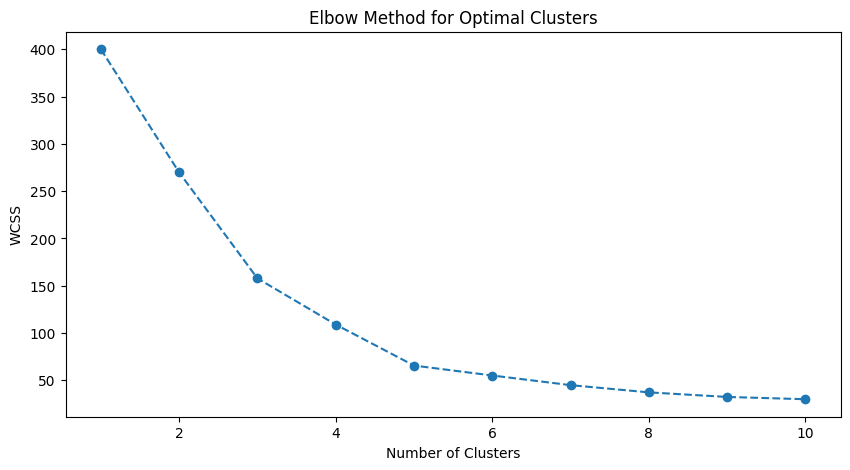

In [ ]:
# Plot the Elbow Method graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Clusters')
plt.show()



In [ ]:
# Train K-Means with the optimal number of clusters (assuming 5 from the elbow method)
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)



In [ ]:
# Add cluster labels to the original dataset
df['Cluster'] = y_kmeans



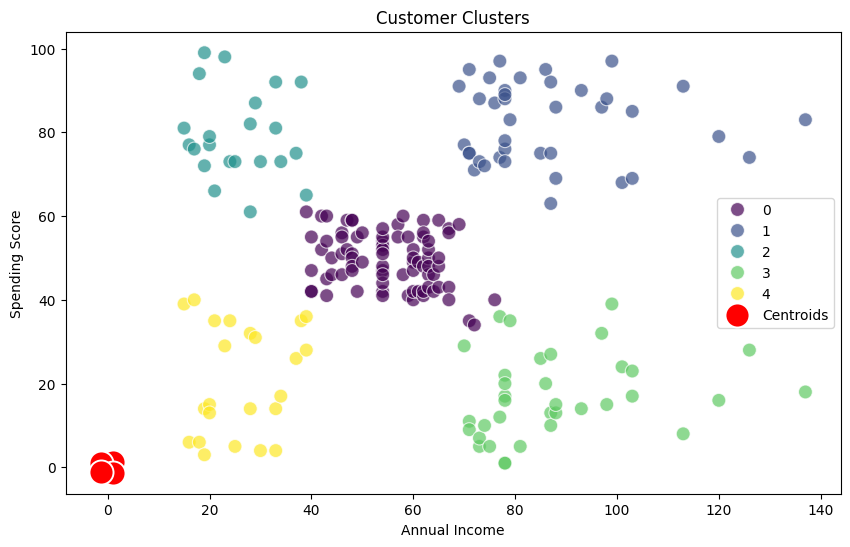

Clustered customer data saved as 'Clustered_Customers.csv'


In [ ]:
# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=df['Cluster'], palette='viridis', s=100, alpha=0.7)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], s=300, color='red', label='Centroids')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Clusters')
plt.legend()
plt.show()



In [ ]:
# Save the clustered dataset
df.to_csv('/content/drive/MyDrive/Mall_Customers.csv', index=False)
print("Clustered customer data saved as 'Clustered_Customers.csv'")

Clustered customer data saved as 'Clustered_Customers.csv'
